In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

pd.set_option('display.max_columns', None)

In [2]:
testCSV = pd.read_csv("test.csv")
trainCSV = pd.read_csv("train.csv")

In [3]:
Ytest = testCSV["Class"].to_numpy()
Ytrain = trainCSV["Class"].to_numpy()

testCSV.drop('Class', axis=1, inplace=True)
trainCSV.drop('Class', axis=1, inplace=True)

Xtest = testCSV.to_numpy()
Xtrain = trainCSV.to_numpy()

In [4]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled  = scaler.transform(Xtest)
Ytrain_scaled = Ytrain
Ytest_scaled = Ytest

In [5]:
knn3 = KNeighborsClassifier(n_neighbors=3, n_jobs=4)
knn3.fit(Xtrain_scaled, Ytrain_scaled)

KNeighborsClassifier(n_jobs=4, n_neighbors=3)

In [6]:
%%time
y3_pred_proba = knn3.predict_proba(Xtest_scaled)[:,1]
y3_pred_proba

Wall time: 9min 6s


array([0., 1., 0., ..., 0., 0., 0.])

In [7]:
knn5 = KNeighborsClassifier(n_neighbors=5, n_jobs=4)
knn5.fit(Xtrain_scaled, Ytrain_scaled)

KNeighborsClassifier(n_jobs=4)

In [8]:
%%time
y5_pred_proba = knn5.predict_proba(Xtest_scaled)[:,1]
y5_pred_proba

Wall time: 9min 46s


array([0., 1., 0., ..., 0., 0., 0.])

In [9]:
knn7 = KNeighborsClassifier(n_neighbors=7, n_jobs=4)
knn7.fit(Xtrain_scaled, Ytrain_scaled)

KNeighborsClassifier(n_jobs=4, n_neighbors=7)

In [10]:
%%time
y7_pred_proba = knn7.predict_proba(Xtest_scaled)[:,1]
y7_pred_proba

Wall time: 9min 22s


array([0., 1., 0., ..., 0., 0., 0.])

<IPython.core.display.Javascript object>


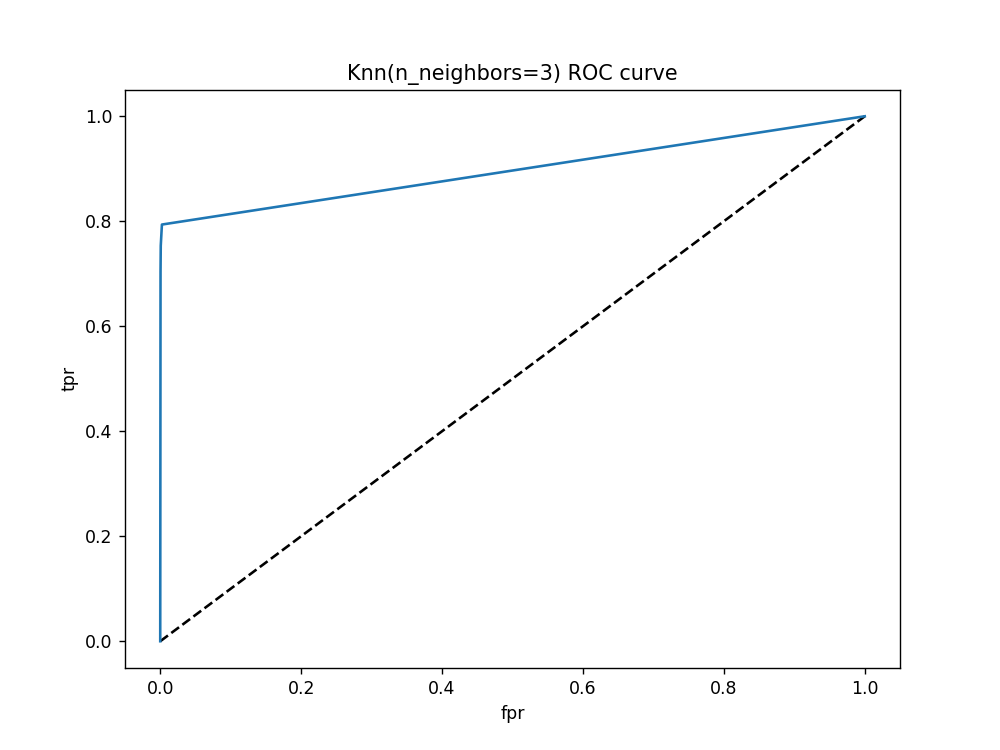

In [11]:
fpr, tpr, thresholds = roc_curve(Ytest_scaled, y3_pred_proba)

plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [12]:
roc_auc_score(Ytest_scaled, y3_pred_proba)

0.8963666658886891

<IPython.core.display.Javascript object>


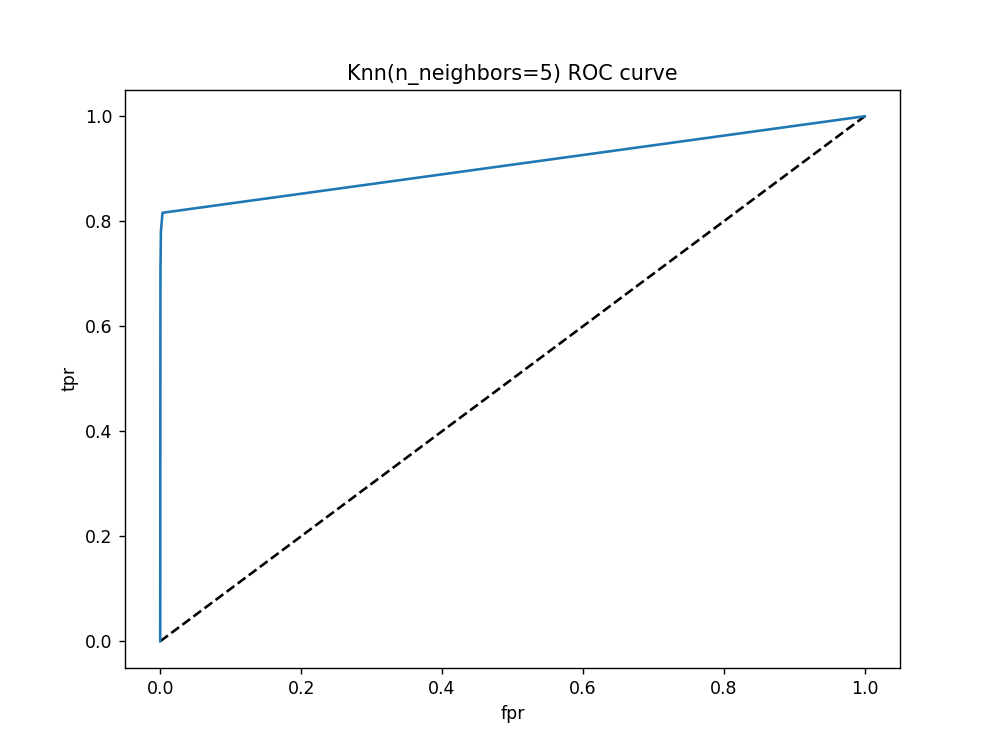

In [13]:
fpr, tpr, thresholds = roc_curve(Ytest_scaled, y5_pred_proba)

plt.figure(2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [14]:
roc_auc_score(Ytest_scaled, y5_pred_proba)

0.9075474340301279

<IPython.core.display.Javascript object>


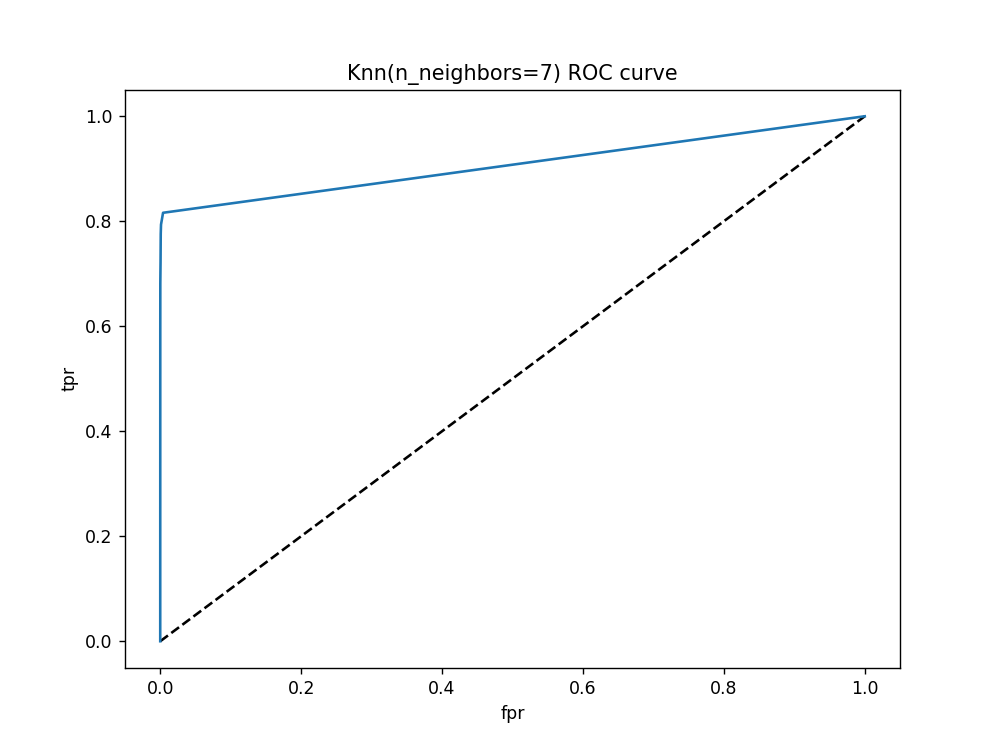

In [15]:
fpr, tpr, thresholds = roc_curve(Ytest_scaled, y7_pred_proba)

plt.figure(3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [16]:
roc_auc_score(Ytest_scaled, y7_pred_proba)

0.9075536946471567